In [42]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns



# Task 1. Reading the data 

In [43]:

data=pd.read_csv('AAPL.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-25,161.119995,163.169998,158.460007,162.880005,161.899261,96046400
1,2022-04-26,162.250000,162.339996,156.720001,156.800003,155.855881,95623200
2,2022-04-27,155.910004,159.789993,155.380005,156.570007,155.627274,88063200
3,2022-04-28,159.250000,164.520004,158.929993,163.639999,162.654678,130216800
4,2022-04-29,161.839996,166.199997,157.250000,157.649994,156.700745,131747600
...,...,...,...,...,...,...,...
245,2023-04-17,165.089996,165.389999,164.029999,165.229996,165.229996,41516200
246,2023-04-18,166.100006,167.410004,165.649994,166.470001,166.470001,49923000
247,2023-04-19,165.800003,168.160004,165.539993,167.630005,167.630005,47720200
248,2023-04-20,166.089996,167.869995,165.559998,166.649994,166.649994,52456400


# Task 2 Data cleaning, checking null values and the string values 

In [44]:
print(data.isnull().any())

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


In [47]:
print(data.isna().any())

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


In [45]:
print(data['Date'].dtype)

object


# Task 3. To visualize the change in stock price over time. 

We can do it by two ways either we can plot open price over date or we can plot the close price.

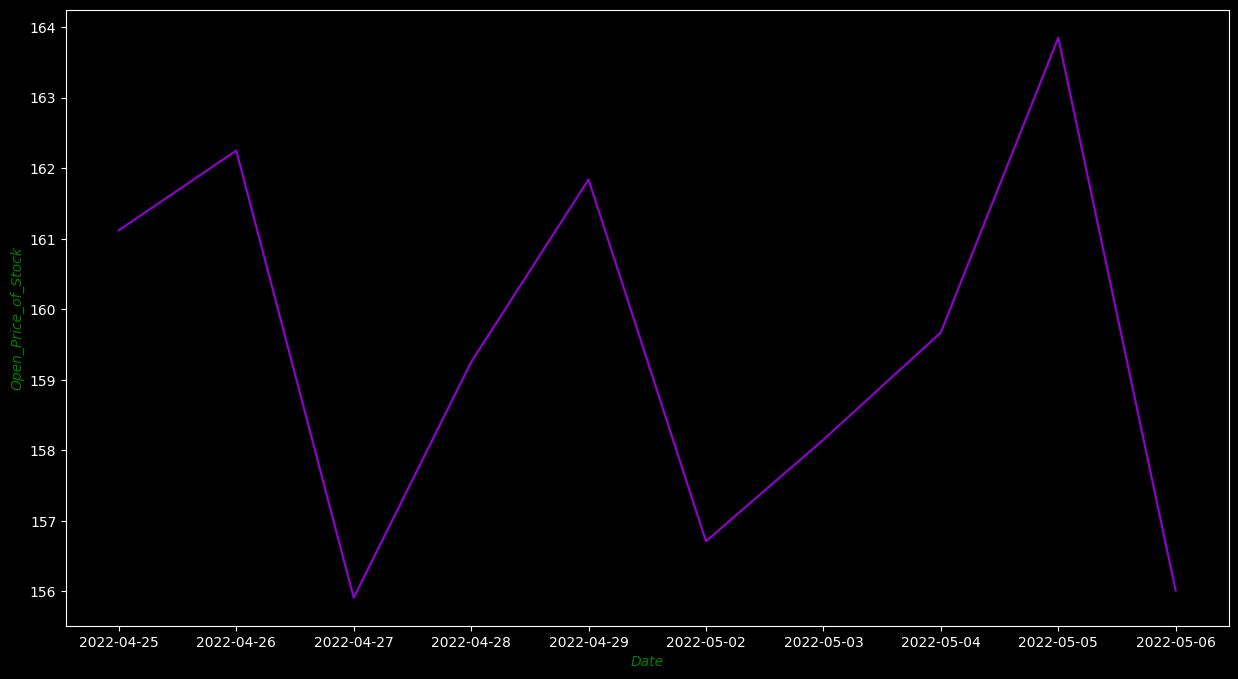

In [46]:
with plt.style.context(('dark_background')):

    fig=plt.figure(figsize=(15,8))
    ch_over_time= plt.plot(data.Date[0:10], data.Open[0:10], color='darkviolet')
    plt.xlabel('Date', color='green', style='italic')
    plt.ylabel('Open_Price_of_Stock',color='green', style='italic')
   




# 4.To check the volumn of the trades traded over the time.

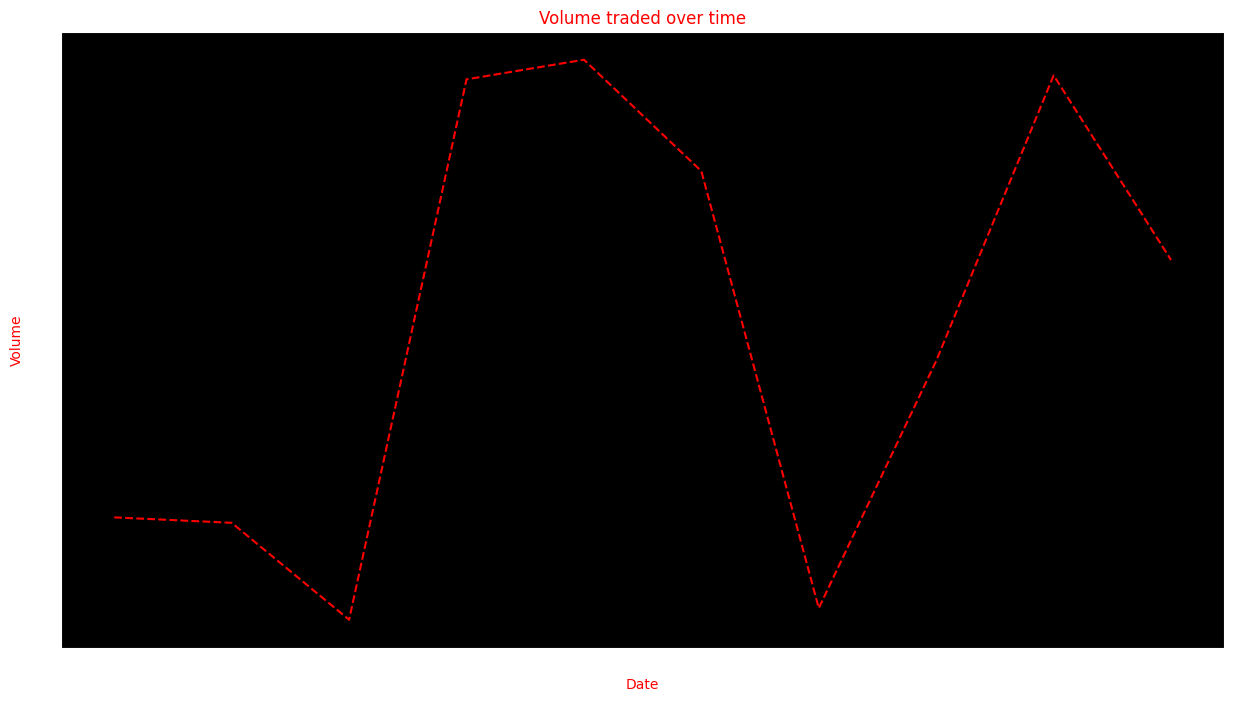

In [49]:
fig=plt.figure(figsize=(15,8))
with plt.style.context(('dark_background')):
    plt.plot(data.Date[0:10], data.Volume[0:10], '--', color='red')
    plt.xlabel('Date', color='red')
    plt.ylabel('Volume',color='red')
    plt.title('Volume traded over time', color='red')
  

    plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2022-04-25'),
  Text(1, 0, '2022-04-26'),
  Text(2, 0, '2022-04-27'),
  Text(3, 0, '2022-04-28'),
  Text(4, 0, '2022-04-29'),
  Text(5, 0, '2022-05-02'),
  Text(6, 0, '2022-05-03'),
  Text(7, 0, '2022-05-04'),
  Text(8, 0, '2022-05-05'),
  Text(9, 0, '2022-05-06')])

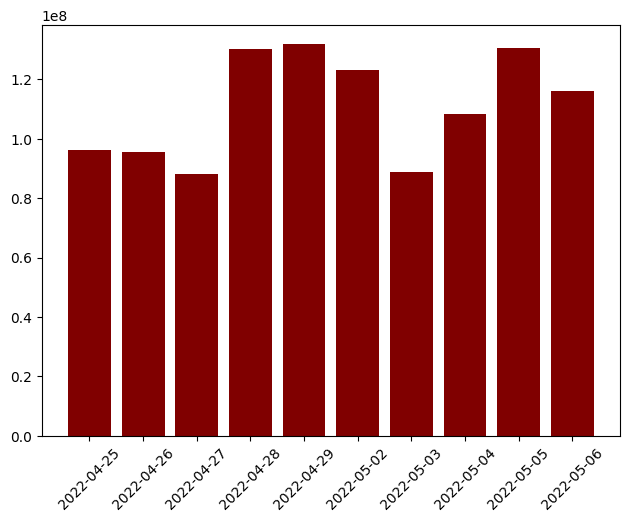

In [51]:
# Aslo can be shown by using bae chart 

plt.bar(data.Date[0:10], data.Volume[0:10],color='maroon')
plt.tight_layout()
plt.xticks(rotation=45)




# 4. To calculate the moving average of the stocks:


**The issue is likely related to the number of NaN values that occur at the beginning of the rolling window calculation. Since the rolling window requires a specified number of data points to compute the average, the first few rows of the moving average

To address this issue, you can either:

Adjust the window size to exclude the rows with NaN values. For example, if you set the window size to 20, you can start plotting the moving average from the 21st row onwards.**




In [131]:
data.drop_duplicates()
data.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,Moving_average
9,2022-05-06,156.009995,159.440002,154.179993,-1.058388,156.562668,116124600,159.505002
10,2022-05-09,154.929993,155.830002,151.490005,-11.202207,151.366486,131577900,158.423001
11,2022-05-10,155.520004,156.740005,152.929993,-1.485460,153.805298,115366700,158.194000
12,2022-05-11,153.500000,155.449997,145.809998,-4.217548,145.831848,142689800,157.187000
13,2022-05-12,142.770004,146.199997,138.800003,-0.481220,141.909805,182602000,155.078999
...,...,...,...,...,...,...,...,...
245,2023-04-17,165.089996,165.389999,164.029999,-1.057234,165.229996,41516200,163.915001
246,2023-04-18,166.100006,167.410004,165.649994,61.026864,166.470001,49923000,163.945001
247,2023-04-19,165.800003,168.160004,165.539993,-0.071485,167.630005,47720200,164.145001
248,2023-04-20,166.089996,167.869995,165.559998,-1.838988,166.649994,52456400,164.434001


In [71]:
data['Date']=pd.to_datetime(data['Date'])


In [81]:
windows=10
data['Moving_average']=data['Close'].rolling(windows).mean()


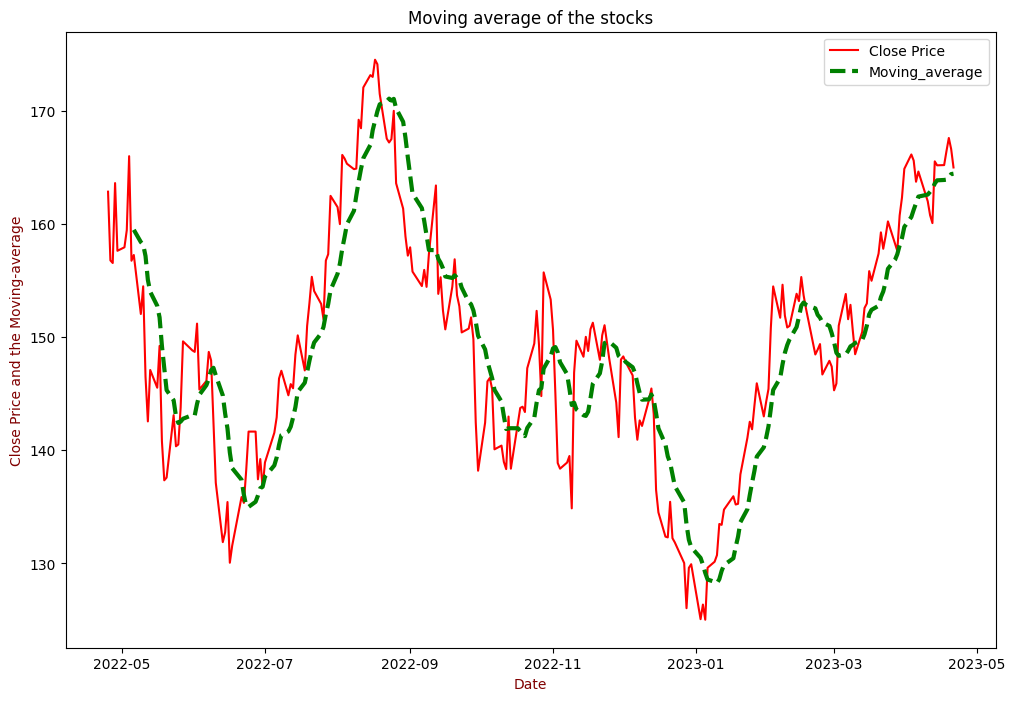

In [110]:
figure=plt.figure(figsize=(12,8))
plt.plot(data['Date'],data['Close'],color='red',label='Close Price')

plt.plot(data.Date[9:],data.Moving_average[9:], '--', color='green',linewidth=3, label='Moving_average')
plt.ylabel('Close Price and the Moving-average',color='maroon')
plt.xlabel('Date',color='maroon')
plt.title('Moving average of the stocks')
plt.legend()

# 6. To visualize the daily return average of the stocks:
Calculate the daily returns: Calculate the percentage change in stock prices from one day to the next. You can use the pct_change() function in pandas to compute the daily returns. Assuming you have a DataFrame named data with a column named 'Close'


In [147]:
data['Daily_Return']=data['Close'].pct_change()
data.head()
data['Daily_Return'].replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=['Daily_Return'], inplace=True)

data['Daily_return_ave']=data['Daily_Return'].mean()
data[20:]

,Date,Open,High,Low,Close,Adj Close,Volume,Moving_average,Daily_Return,Daily_return_ave
26,2022-06-01,149.899994,151.740005,147.679993,-0.836641,148.031769,74286600,143.072002,-0.260378,-0.950042
27,2022-06-02,147.830002,151.270004,146.860001,-20.249208,150.520370,72348100,144.111002,23.202983,-0.950042
28,2022-06-03,146.899994,147.970001,144.460007,-3.293445,144.716949,88570300,144.914001,-0.837354,-0.950042
29,2022-06-06,147.029999,148.570007,144.899994,-1.135587,145.473495,71598400,145.769002,-0.655198,-0.950042
30,2022-06-07,144.350006,149.000000,144.100006,2.364030,148.031769,67808200,146.329002,-3.081770,-0.950042
...,...,...,...,...,...,...,...,...,...,...
245,2023-04-17,165.089996,165.389999,164.029999,-1.057234,165.229996,41516200,163.915001,-0.004476,-0.950042
246,2023-04-18,166.100006,167.410004,165.649994,61.026864,166.470001,49923000,163.945001,-58.723144,-0.950042
247,2023-04-19,165.800003,168.160004,165.539993,-0.071485,167.630005,47720200,164.145001,-1.001171,-0.950042
248,2023-04-20,166.089996,167.869995,165.559998,-1.838988,166.649994,52456400,164.434001,24.725535,-0.950042


In [162]:
data['Daily_return_ave']=data['Daily_return_ave'].replace(-1,0)
data.dropna(subset=['Daily_return_ave'],inplace=True)


In [163]:
data['Daily_return_ave']=data['Daily_return_ave'].astype(float)

In [165]:
data['Daily_return_ave']=data['Daily_return_ave']*-1

In [166]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Moving_average,Daily_Return,Daily_return_ave
6,2022-05-03,158.149994,160.710007,156.320007,3.893362,158.519730,88966500,NaN,-4.694868,0.950042
7,2022-05-04,159.669998,166.479996,159.259995,3.261660,165.020370,108256500,NaN,-0.162251,0.950042
8,2022-05-05,163.850006,164.080002,154.949997,-2.358655,155.826080,130525300,NaN,-1.723146,0.950042
9,2022-05-06,156.009995,159.440002,154.179993,-1.058388,156.562668,116124600,159.505002,-0.551275,0.950042
10,2022-05-09,154.929993,155.830002,151.490005,-11.202207,151.366486,131577900,158.423001,9.584219,0.950042


In [219]:
data['Trend']='Positive'
data.loc[data['Daily_Return'] < 0, 'Trend'] = 'Negative'



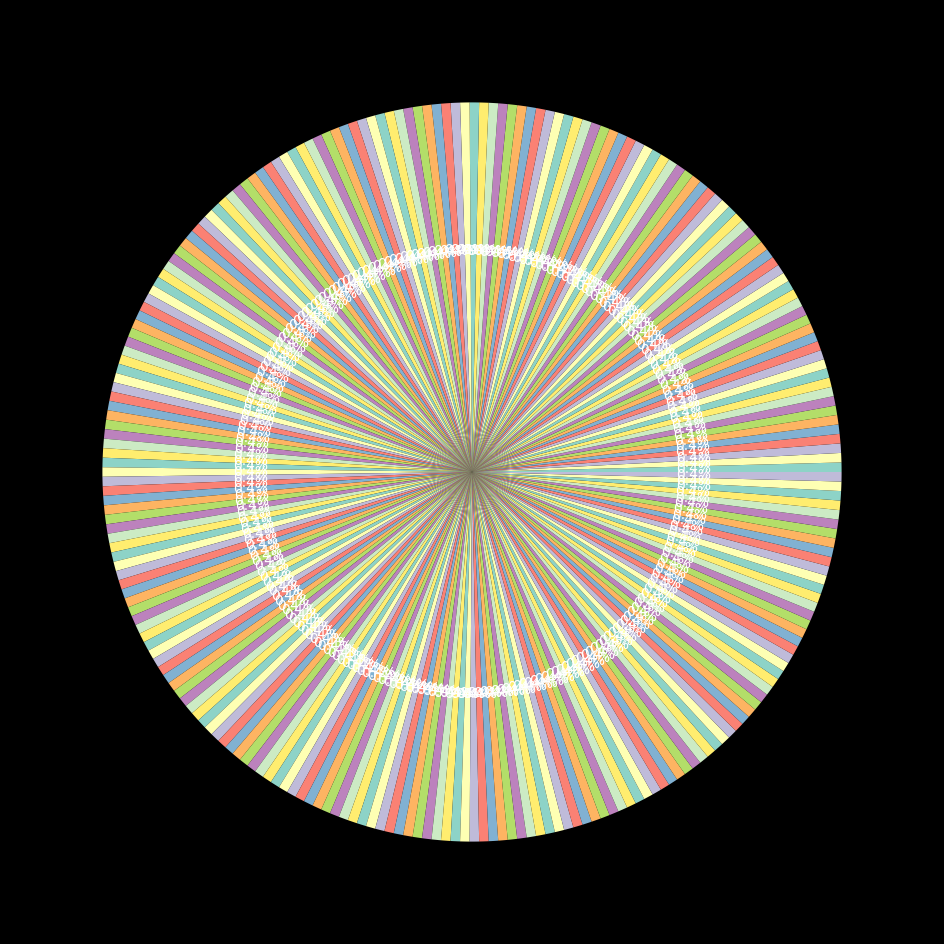

In [223]:
plt.figure(figsize=(12,12))
plt.pie(data['Daily_return_ave'],autopct='%1.1f%%')
plt.show()

In [177]:
import yfinance as yf

ticker_symbol='MSFT'
data1=yf.download(ticker_symbol, start='2022-01-01',end='2022-12-31')
data1.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,335.350006,338.000000,329.779999,334.750000,330.092285,28865100
2022-01-04,334.829987,335.200012,326.119995,329.010010,324.432159,32674300
2022-01-05,325.859985,326.070007,315.980011,316.380005,311.977844,40054300
2022-01-06,313.149994,318.700012,311.489990,313.880005,309.512634,39646100
2022-01-07,314.149994,316.500000,310.089996,314.040009,309.670441,32720000


In [189]:
dd=pd.merge(data,data1,on='Date',how='inner')
dd.head()

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Moving_average,Daily_Return,Daily_return_ave,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2022-05-03,158.149994,160.710007,156.320007,3.893362,158.519730,88966500,NaN,-4.694868,0.950042,283.959991,284.130005,280.149994,281.779999,278.433838,25978600
1,2022-05-04,159.669998,166.479996,159.259995,3.261660,165.020370,108256500,NaN,-0.162251,0.950042,282.589996,290.880005,276.730011,289.980011,286.536499,33599300
2,2022-05-05,163.850006,164.080002,154.949997,-2.358655,155.826080,130525300,NaN,-1.723146,0.950042,285.540009,286.350006,274.339996,277.350006,274.056488,43260400
3,2022-05-06,156.009995,159.440002,154.179993,-1.058388,156.562668,116124600,159.505002,-0.551275,0.950042,274.809998,279.250000,271.269989,274.730011,271.467529,37780300
4,2022-05-09,154.929993,155.830002,151.490005,-11.202207,151.366486,131577900,158.423001,9.584219,0.950042,270.059998,272.359985,263.320007,264.579987,261.438049,47726000


In [190]:
dd.tail()

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Moving_average,Daily_Return,Daily_return_ave,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
162,2022-12-23,130.919998,132.419998,129.639999,-0.882297,131.658981,63814900,136.839000,-0.558510,0.950042,236.110001,238.869995,233.940002,238.729996,237.614105,21207000
163,2022-12-27,131.380005,131.410004,128.720001,3.959897,129.831772,69007800,135.392999,-5.488169,0.950042,238.699997,238.929993,235.830002,236.960007,235.852386,16688600
164,2022-12-28,129.669998,131.029999,125.870003,1.211010,125.847855,85438400,133.449999,-0.694182,0.950042,236.889999,239.720001,234.169998,234.529999,233.433731,17457100
165,2022-12-29,127.989998,130.479996,127.730003,-1.923062,129.412415,75703700,132.089999,-2.587982,0.950042,235.649994,241.919998,235.649994,241.009995,239.883438,19770700
166,2022-12-30,128.410004,129.949997,127.430000,-0.912835,129.731918,77034200,131.432998,-0.525322,0.950042,238.210007,239.960007,236.660004,239.820007,238.699020,21938500


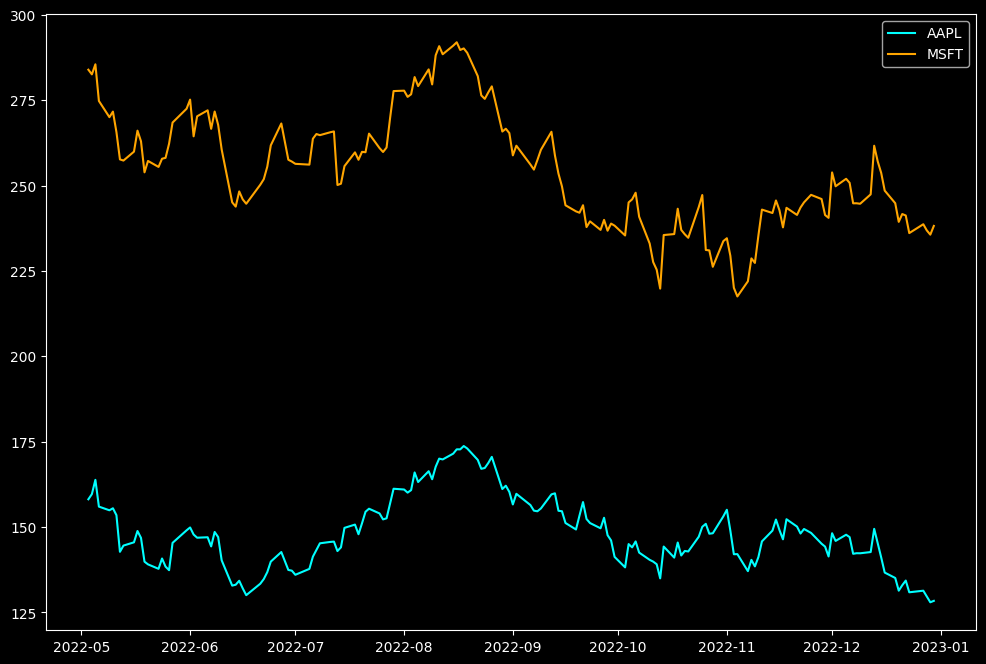

In [200]:
plt.figure(figsize=(12,8))
plt.style.use('dark_background')
plt.plot(dd['Date'],dd['Open_x'],label='AAPL',color='cyan')
plt.plot(dd['Date'],dd['Open_y'],label='MSFT',color='orange')
plt.legend()

<AxesSubplot:xlabel='Close_x', ylabel='Open_x'>

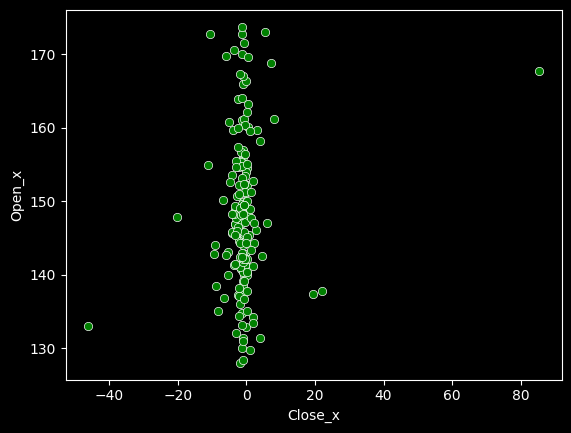

In [205]:
sns.scatterplot(x=dd['Close_x'],y=dd['Open_x'],color='green')